[link](https://lmfit-py.readthedocs.io/en/0.9.4/fitting.html)


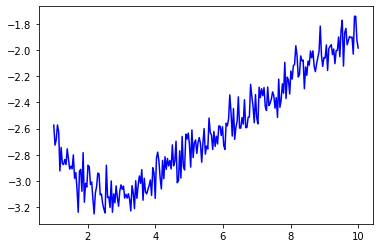

In [8]:
import lmfit
import corner
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
x = np.linspace(1, 10, 250)
np.random.seed(0)
y = 3.0 * np.exp(-x / 2) - 5.0 *\
    np.exp(-(x - 0.1) / 10.) +\
0.1 * np.random.randn(len(x))
plt.plot(x, y, 'b')
plt.show();

<ipython-input-9-32d88d43b340>:9: RuntimeWarning: overflow encountered in exp
  return v['a1'] * np.exp(-x / v['t1']) +\
<ipython-input-9-32d88d43b340>:9: RuntimeWarning: overflow encountered in multiply
  return v['a1'] * np.exp(-x / v['t1']) +\
/home/ziaee/.local/lib/python3.8/site-packages/lmfit/minimizer.py:184: RuntimeWarning: overflow encountered in multiply
  return (r*r).sum()
[[Variables]]
    a1:  2.98623689 +/- 0.15010519 (5.03%) (init = 4)
    a2: -4.33525597 +/- 0.11765823 (2.71%) (init = 4)
    t1:  1.30993186 +/- 0.13449655 (10.27%) (init = 3)
    t2:  11.8240752 +/- 0.47172606 (3.99%) (init = 3)
[[Correlations]] (unreported correlations are < 0.500)
    C(a2, t2) =  0.988
    C(a2, t1) = -0.928
    C(t1, t2) = -0.885
    C(a1, t1) = -0.609


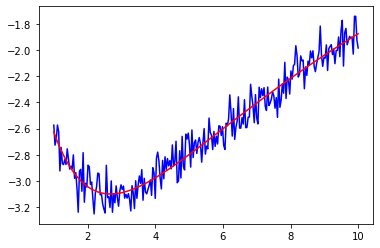

In [9]:
p = lmfit.Parameters()
p.add_many(('a1', 4.), 
           ('a2', 4.), 
           ('t1', 3.), 
           ('t2', 3., True))

def residual(p):
    v = p.valuesdict()
    return v['a1'] * np.exp(-x / v['t1']) +\
           v['a2'] * np.exp(-(x - 0.1) / v['t2']) - y

mi = lmfit.minimize(residual, 
                    p, 
                    method='nedler', 
                    nan_policy='omit')
lmfit.printfuncs.report_fit(mi.params, min_correl=0.5)
# mi.params.pretty_print()
plt.plot(x, y, 'b')
plt.plot(x, residual(mi.params) + y, 'r')
plt.show()

calculating the posterior probability distribution of parameters

In [10]:
mi.params.add('__lnsigma', 
              value=np.log(0.1), 
              min=np.log(0.001), 
              max=np.log(2))

In [11]:
res = lmfit.minimize(residual, 
                     method='emcee', 
                     nan_policy='omit', 
                     burn=300, 
                     steps=1000, 
                     thin=20,
                     params=mi.params, 
                     is_weighted=False)

100%|██████████| 1000/1000 [00:12<00:00, 79.63it/s] The chain is shorter than 50 times the integrated autocorrelation time for 5 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [42.15955322 47.347426   48.71211873 46.7985718  40.89881208]



In [19]:
# print(list(res.params.valuesdict().values()))
# print(res.var_names)
print(res.flatchain.shape)

(3500, 5)


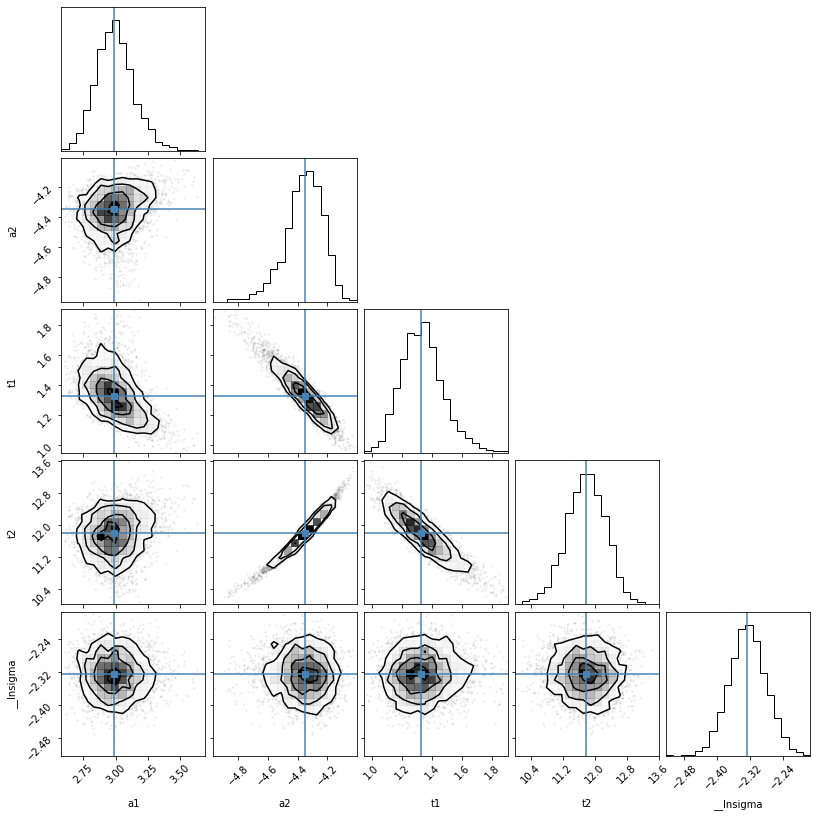

In [12]:
corner.corner(res.flatchain, 
              labels=res.var_names, 
              truths=list(res.params.valuesdict().values()));

In [13]:
print("median of posterior probability distribution")
print('--------------------------------------------')
lmfit.report_fit(res.params)

median of posterior probability distribution
--------------------------------------------
[[Variables]]
    a1:         2.98945718 +/- 0.14033921 (4.69%) (init = 2.986237)
    a2:        -4.34687243 +/- 0.12131092 (2.79%) (init = -4.335256)
    t1:         1.32883916 +/- 0.13766047 (10.36%) (init = 1.309932)
    t2:         11.7836194 +/- 0.47719763 (4.05%) (init = 11.82408)
    __lnsigma: -2.32559226 +/- 0.04542650 (1.95%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, t2) =  0.981
    C(a2, t1) = -0.938
    C(t1, t2) = -0.894
    C(a1, t1) = -0.508
    C(a1, a2) =  0.214
    C(a1, t2) =  0.178


In [14]:
# find the maximum likelihood solution
highest_prob = np.argmax(res.lnprob)
hp_loc = np.unravel_index(highest_prob, res.lnprob.shape)
mle_soln = res.chain[hp_loc]
for i, par in enumerate(p):
    p[par].value = mle_soln[i]

print("\nMaximum likelihood Estimation")
print('-----------------------------')
pprint(p)


Maximum likelihood Estimation
-----------------------------
Parameters([('a1', <Parameter 'a1', value=2.93839265493461, bounds=[-inf:inf]>),
            ('a2',
             <Parameter 'a2', value=-4.35274181843828, bounds=[-inf:inf]>),
            ('t1',
             <Parameter 't1', value=1.3430961450623493, bounds=[-inf:inf]>),
            ('t2',
             <Parameter 't2', value=11.787821680468856, bounds=[-inf:inf]>)])
